# Credit Card Fraud Detection

<img src="8095274.jpg" alt="Credit Card Fraud Detection" width="400" height="200">

## Introduction

In today's digital age, the rise of electronic transactions has necessitated robust systems for detecting and preventing credit card fraud. This Jupyter Notebook aims to address this critical issue by leveraging machine learning techniques to identify fraudulent transactions within a dataset of credit card transactions made by European cardholders in September 2013.

### Dataset Overview

The dataset encompasses transactions occurring over a two-day period, comprising 492 fraudulent transactions out of a total of 284,807. The highly imbalanced class distribution, with frauds accounting for only 0.172% of all transactions, presents a challenging scenario for traditional classification methods. The data is anonymized, processed through Principal Component Analysis (PCA), and unfortunately, the original features and background information remain confidential.

### Features

The dataset primarily includes numerical input variables resulting from PCA transformation, with 'Time' and 'Amount' being exceptions. 'Time' represents the seconds elapsed between each transaction and the first in the dataset, while 'Amount' denotes the transaction amount. The response variable, 'Class,' is binary, taking a value of 1 in the case of fraud and 0 otherwise.

### Challenge and Evaluation

Given the significant class imbalance, traditional accuracy metrics are inadequate. Instead, we recommend evaluating performance using the Area Under the Precision-Recall Curve (AUPRC). This provides a more nuanced understanding of the model's effectiveness in identifying fraudulent transactions within unbalanced datasets.

### Data Simulator and Resources

An update in March 2021 introduces a simulator for transaction data, offering a practical handbook on Machine Learning for Credit Card Fraud Detection. Practitioners are encouraged to explore this data simulator and methodologies presented in the handbook for enhanced understanding and application.

### Acknowledgements and Citations

The dataset is a result of collaborative research between Worldline and the Machine Learning Group at ULB. Practitioners are urged to cite relevant works, including those by Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson, and Gianluca Bontempi, who have contributed to the development and calibration of probability models for unbalanced classification.

This notebook serves as a valuable resource for data scientists, providing insights into credit card fraud detection techniques and methodologies honed through rigorous research and real-world application.


## Import lib 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

## Load Data

In [2]:
df = pd.read_csv('data/creditcard.csv')


## Explore Data 

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

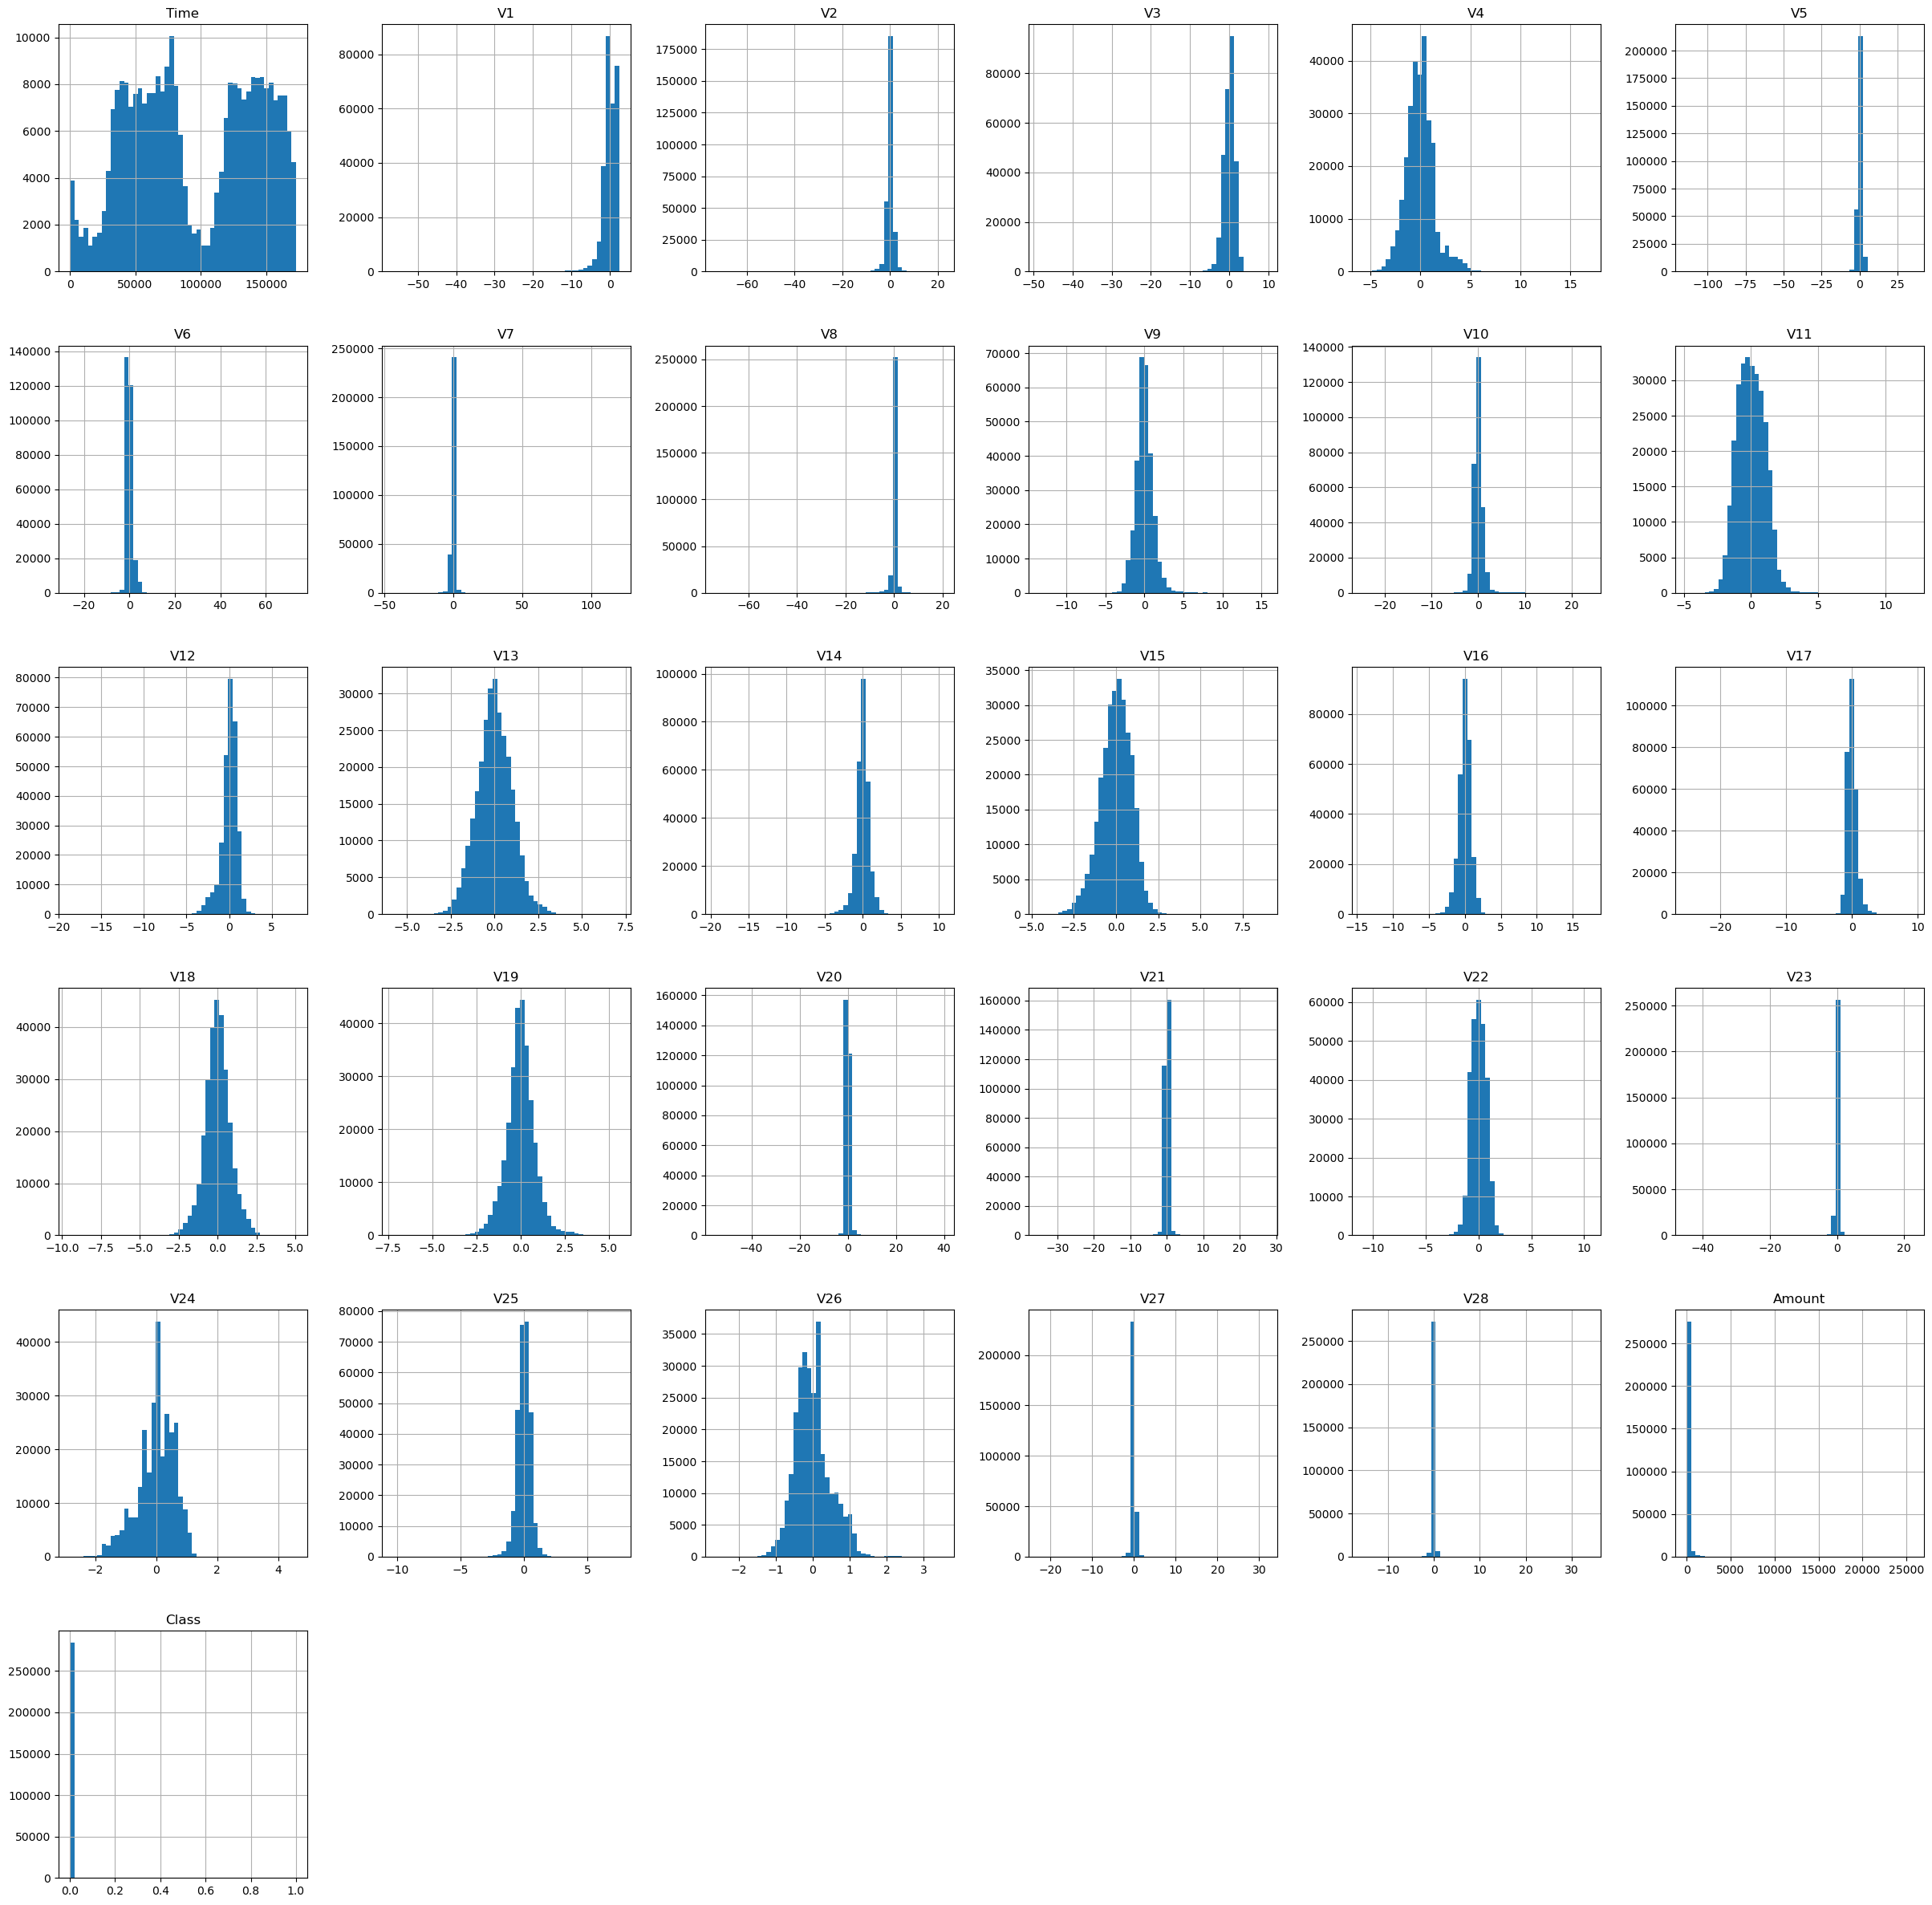

In [6]:
df.hist(bins=50,figsize=(30,30))

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Process Data

In [8]:
scaler = RobustScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['Time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,0.118914,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,0.927124,0.001727
std,0.557903,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,3.495006,0.041527
min,-0.994983,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,-0.307413,0.000000
25%,-0.358210,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,-0.229162,0.000000
50%,0.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000,0.000000
75%,0.641790,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.770838,0.000000
max,1.035022,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,358.683155,1.000000


In [10]:
df = df.sample(frac = 1,random_state=1)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169876,0.413715,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,-0.282401,0
127467,-0.074625,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,-0.279746,0
137900,-0.027138,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,...,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,-0.294977,0
21513,-0.622364,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,...,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,-0.084119,0
134700,-0.044279,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,...,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,-0.296793,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21440,-0.622963,-2.986845,-8.663978,-1.910863,0.664058,-3.934875,0.861269,1.647511,-0.480963,-1.546866,...,1.252092,-0.993085,-2.173147,0.145570,-0.235062,-0.227411,-0.382702,0.404045,32.002515,0
117583,-0.117048,0.937083,-0.849673,0.524186,-0.020031,-0.606327,0.692302,-0.463724,0.148857,0.785062,...,-0.143322,-0.479981,-0.237902,-0.715247,0.251418,0.975406,-0.060168,0.023771,2.086495,0
73349,-0.347713,-1.149963,1.696462,1.637114,2.658991,-0.021502,0.192287,0.205204,0.588754,-1.187820,...,0.025147,0.086506,-0.262748,0.321538,0.341667,0.210343,-0.162047,0.031193,-0.201495,0
267336,0.916787,1.754554,-0.699398,-0.076332,0.443915,-0.672082,0.389061,-0.807534,0.202915,0.858635,...,0.141950,0.358412,0.259748,0.746839,-0.560808,0.104636,-0.005853,-0.019622,1.017257,0


## Modeling 

In [12]:
x_train , y_train = df.to_numpy()[:,:-1],df.to_numpy()[:,-1]
x_test , y_test = df.to_numpy()[:,:-1],df.to_numpy()[:,-1]
x_val , y_val = df.to_numpy()[:,:-1],df.to_numpy()[:,-1]

In [13]:
def train_logistic_regression(x_train, y_train, x_val, y_val):
    """Train a Logistic Regression model."""
    logistic_model = LogisticRegression()
    logistic_model.fit(x_train, y_train)
    print("Logistic Regression Training Accuracy:", logistic_model.score(x_train, y_train))
    print("Logistic Regression Validation Report:")
    print(classification_report(y_val, logistic_model.predict(x_val), target_names=['not fraud', 'fraud']))

In [14]:
print("\nTraining Logistic Regression on Imbalanced Dataset:")
train_logistic_regression(x_train,y_train,x_val,y_val)


Training Logistic Regression on Imbalanced Dataset:


C:\Users\zahra\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Training Accuracy: 0.9992064801778047
Logistic Regression Validation Report:
              precision    recall  f1-score   support

   not fraud       1.00      1.00      1.00    284315
       fraud       0.88      0.63      0.73       492

    accuracy                           1.00    284807
   macro avg       0.94      0.81      0.87    284807
weighted avg       1.00      1.00      1.00    284807



In [15]:
def build_neural_network(input_shape):
    """Build a simple neural network model."""
    nn_model = Sequential()
    nn_model.add(InputLayer(input_shape=input_shape))
    nn_model.add(Dense(2, activation='relu'))
    nn_model.add(BatchNormalization())
    nn_model.add(Dense(1, activation='sigmoid'))
    nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return nn_model

In [16]:
def train_neural_network(model, x_train, y_train, x_val, y_val, epochs=5):
    """Train a neural network model."""
    checkpoint = ModelCheckpoint('nn_model', save_best_only=True)
    model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs, callbacks=[checkpoint])
    print("Neural Network Training Report:")
    print(classification_report(y_val, neural_network_pred(model, x_val), target_names=['not fraud', 'fraud']))

In [17]:
def neural_network_pred(model, x):
    """Predict using a trained neural network model."""
    return (model.predict(x).flatten() > 0.5).astype(int)

In [19]:
print("\nTraining Neural Network on Imbalanced Dataset:")
nn_model = build_neural_network(x_train.shape[1])
train_neural_network(nn_model,x_train,y_train,x_val,y_val)


Training Neural Network on Imbalanced Dataset:


Epoch 1/5


8898/8901 [============================>.] - ETA: 0s - loss: 0.0494 - accuracy: 0.9916INFO:tensorflow:Assets written to: nn_model\assets


INFO:tensorflow:Assets written to: nn_model\assets


8901/8901 [==============================] - 58s 6ms/step - loss: 0.0494 - accuracy: 0.9916 - val_loss: 0.0113 - val_accuracy: 0.9983
Epoch 2/5
8901/8901 [==============================] - ETA: 0s - loss: 0.0106 - accuracy: 0.9983INFO:tensorflow:Assets written to: nn_model\assets


INFO:tensorflow:Assets written to: nn_model\assets


8901/8901 [==============================] - 43s 5ms/step - loss: 0.0106 - accuracy: 0.9983 - val_loss: 0.0074 - val_accuracy: 0.9983
Epoch 3/5
8896/8901 [============================>.] - ETA: 0s - loss: 0.0047 - accuracy: 0.9989INFO:tensorflow:Assets written to: nn_model\assets


INFO:tensorflow:Assets written to: nn_model\assets


8901/8901 [==============================] - 44s 5ms/step - loss: 0.0047 - accuracy: 0.9989 - val_loss: 0.0047 - val_accuracy: 0.9993
Epoch 4/5
8901/8901 [==============================] - 38s 4ms/step - loss: 0.0039 - accuracy: 0.9992 - val_loss: 0.0052 - val_accuracy: 0.9993
Epoch 5/5
8901/8901 [==============================] - 38s 4ms/step - loss: 0.0037 - accuracy: 0.9992 - val_loss: 0.0057 - val_accuracy: 0.9992
Neural Network Training Report:
8901/8901 [==============================] - 17s 2ms/step
              precision    recall  f1-score   support

   not fraud       1.00      1.00      1.00    284315
       fraud       0.73      0.82      0.78       492

    accuracy                           1.00    284807
   macro avg       0.87      0.91      0.89    284807
weighted avg       1.00      1.00      1.00    284807



## Balance data

In [20]:
def balance_dataset(df):
    """Balance the dataset by oversampling the minority class."""
    frauds = df.query("Class == 1")
    not_frauds = df.query("Class == 0")
    balanced_df = pd.concat([frauds, not_frauds.sample(len(frauds), random_state=1)])
    return balanced_df.sample(frac=1, random_state=1)

In [21]:
balanced_df = balance_dataset(df)

In [23]:
x_train_b , y_train_b = balanced_df.to_numpy()[:700,:-1],balanced_df.to_numpy()[:700,-1].astype(int)
x_test_b , y_test_b = balanced_df.to_numpy()[700:842,:-1],balanced_df.to_numpy()[700:842,-1].astype(int)
x_val_b , y_val_b = balanced_df.to_numpy()[842:,:-1],balanced_df.to_numpy()[842:,-1].astype(int)

In [24]:
print("\nTraining Logistic Regression on balanced Dataset:")
train_logistic_regression(x_train_b,y_train_b,x_val_b,y_val_b)


Training Logistic Regression on balanced Dataset:
Logistic Regression Training Accuracy: 0.9528571428571428
Logistic Regression Validation Report:
              precision    recall  f1-score   support

   not fraud       0.96      0.93      0.94        72
       fraud       0.93      0.96      0.94        70

    accuracy                           0.94       142
   macro avg       0.94      0.94      0.94       142
weighted avg       0.94      0.94      0.94       142



In [27]:
print("\nTraining Neural Network on Imbalanced Dataset:")
nn_model_b = build_neural_network(x_train_b.shape[1])
train_neural_network(nn_model_b,x_train_b,y_train_b,x_val_b,y_val_b)


Training Neural Network on Imbalanced Dataset:
Epoch 1/5
16/22 [====================>.........] - ETA: 0s - loss: 0.6296 - accuracy: 0.7207 INFO:tensorflow:Assets written to: nn_model\assets


INFO:tensorflow:Assets written to: nn_model\assets


22/22 [==============================] - 3s 82ms/step - loss: 0.5967 - accuracy: 0.7300 - val_loss: 0.7935 - val_accuracy: 0.8310
Epoch 2/5
15/22 [===================>..........] - ETA: 0s - loss: 0.5476 - accuracy: 0.7708INFO:tensorflow:Assets written to: nn_model\assets


INFO:tensorflow:Assets written to: nn_model\assets


22/22 [==============================] - 1s 68ms/step - loss: 0.5603 - accuracy: 0.7657 - val_loss: 0.7410 - val_accuracy: 0.8310
Epoch 3/5
15/22 [===================>..........] - ETA: 0s - loss: 0.4968 - accuracy: 0.8042INFO:tensorflow:Assets written to: nn_model\assets


INFO:tensorflow:Assets written to: nn_model\assets


22/22 [==============================] - 1s 57ms/step - loss: 0.5270 - accuracy: 0.7886 - val_loss: 0.6604 - val_accuracy: 0.8380
Epoch 4/5
17/22 [======================>.......] - ETA: 0s - loss: 0.5052 - accuracy: 0.8070INFO:tensorflow:Assets written to: nn_model\assets


INFO:tensorflow:Assets written to: nn_model\assets


22/22 [==============================] - 1s 60ms/step - loss: 0.5122 - accuracy: 0.7971 - val_loss: 0.6066 - val_accuracy: 0.8310
Epoch 5/5
16/22 [====================>.........] - ETA: 0s - loss: 0.4904 - accuracy: 0.8145INFO:tensorflow:Assets written to: nn_model\assets


INFO:tensorflow:Assets written to: nn_model\assets


22/22 [==============================] - 2s 75ms/step - loss: 0.4964 - accuracy: 0.8143 - val_loss: 0.5399 - val_accuracy: 0.8380
Neural Network Training Report:
5/5 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

   not fraud       0.88      0.79      0.83        72
       fraud       0.81      0.89      0.84        70

    accuracy                           0.84       142
   macro avg       0.84      0.84      0.84       142
weighted avg       0.84      0.84      0.84       142

